PASO 1: Instalar (pip install yfinance --upgrade --no-cache-dir)

PASO 2: Importar librerias

In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from datetime import date
from dateutil.relativedelta import relativedelta

PASO 3: Agregamos configuración extra de pandas

In [3]:
pd.set_option('display.max_rows', 8)
pd.set_option('display.precision', 4)
%matplotlib inline

PASO 4: Recuperamos tickers

PASO 5: Usamos python para recuperar datos de yahoo!finance por ticker

In [4]:
tickers=['GOLD', 'TEL'  ]
precios={}
i=1
for ticker in tickers:
    precios[ticker] = yf.download(ticker, period='10y')
    i+=1
    
#precios

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [5]:
precios['GOLD']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-30,17.93,18.34,17.840,18.3000,15.2801,7898600
2014-07-01,18.30,18.45,18.020,18.1900,15.1882,7210200
2014-07-02,18.14,18.46,18.130,18.3400,15.3135,6742700
2014-07-03,18.18,18.47,18.050,18.4400,15.3970,6755700
...,...,...,...,...,...,...
2024-06-25,16.61,16.79,16.510,16.5900,16.5900,14947300
2024-06-26,16.34,16.84,16.330,16.8000,16.8000,16932300
2024-06-27,16.98,17.02,16.830,16.8400,16.8400,14782400
2024-06-28,16.99,17.01,16.744,16.7745,16.7745,2876326


In [6]:
print(type(precios['GOLD']))

<class 'pandas.core.frame.DataFrame'>


Desde una fecha especifica

In [7]:
tickers=['GOLD', 'TEL'  ]
precios={}
i=1
for ticker in tickers:
    precios[ticker] = yf.download(ticker, start="2022-01-23", end=None)
    i+=1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
precios['TEL']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-24,148.62,152.85,145.09,152.51,146.0797,2567000
2022-01-25,149.86,151.08,147.30,149.20,142.9093,1543600
2022-01-26,148.79,148.79,139.13,140.72,134.7868,3361300
2022-01-27,143.17,143.17,136.33,137.27,131.4822,2558100
...,...,...,...,...,...,...
2024-06-24,152.35,153.54,151.09,151.10,151.1000,1674500
2024-06-25,150.79,150.79,148.13,149.49,149.4900,1736500
2024-06-26,148.72,149.08,147.16,147.84,147.8400,1879600
2024-06-27,148.10,148.88,147.82,148.71,148.7100,924000


Me quedo con las primeras 6 filas y 4 columnas

In [9]:
precios['TEL'].iloc[0:6, 0:4]

,Open,High,Low,Close
Date,,,,
2022-01-24,148.62,152.85,145.09,152.51
2022-01-25,149.86,151.08,147.30,149.20
2022-01-26,148.79,148.79,139.13,140.72
2022-01-27,143.17,143.17,136.33,137.27
2022-01-28,137.27,140.50,134.30,140.42
2022-01-31,139.48,143.22,139.01,143.01


PASO 6: Organizamos los datos

In [10]:
tickers=['GOLD', 'TEL', "IBM"] 
precios={}
i=1
for ticker in tickers:
    precios[ticker] = yf.download(ticker, start="2022-01-23", end=None)
    i+=1

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


PASO 6: Obtenemos una columna específica

In [11]:
def filtro_por_columna(precios, column):
    diccionario={}
    columnas=[]
    for ticker in precios:
        columnas.append(ticker)
        datos=precios[ticker]
        diccionario[ticker]=datos[column]
    return pd.DataFrame(diccionario)
    
df = filtro_por_columna(precios, "Adj Close")
df[:7]

,GOLD,TEL,IBM
Date,,,
2022-01-24,17.9959,146.0797,114.7307
2022-01-25,18.1074,142.9092,121.2144
2022-01-26,17.6800,134.7868,119.5757
2022-01-27,17.3827,131.4823,118.0260
2022-01-28,17.2434,134.4995,119.7894
2022-01-31,17.7915,136.9802,118.9612
2022-02-01,17.7358,137.0665,120.7068


PASO 6: Graficamos seríe de tiempo

<Axes: xlabel='Date'>

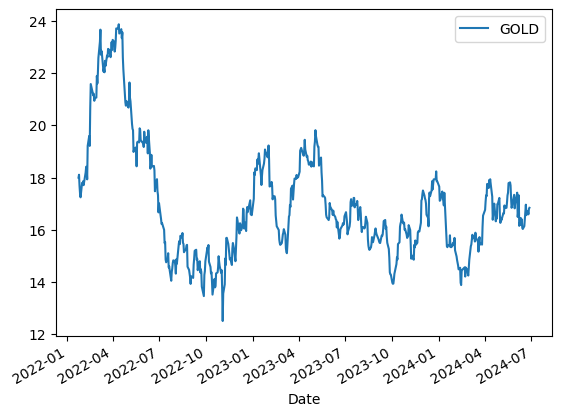

In [12]:
df[['GOLD', ]].plot()

<Axes: xlabel='Date'>

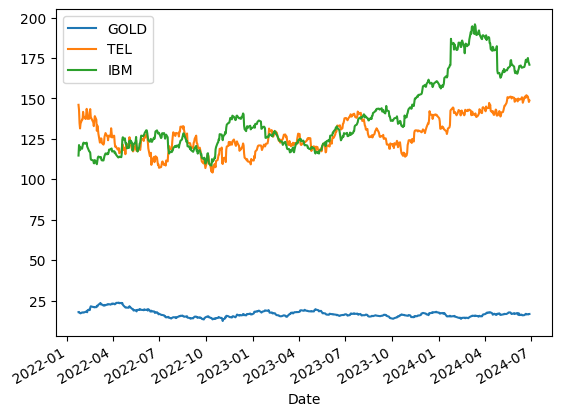

In [13]:
df[['GOLD', 'TEL', "IBM"]].plot()

In [14]:
dfv = filtro_por_columna(precios, "Volume")
print(dfv.index)
print(dfv['TEL'])

DatetimeIndex(['2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04',
               ...
               '2024-06-13', '2024-06-14', '2024-06-17', '2024-06-18',
               '2024-06-20', '2024-06-21', '2024-06-24', '2024-06-25',
               '2024-06-26', '2024-06-27'],
              dtype='datetime64[ns]', name='Date', length=610, freq=None)
Date
2022-01-24    2567000
2022-01-25    1543600
2022-01-26    3361300
2022-01-27    2558100
               ...   
2024-06-24    1674500
2024-06-25    1736500
2024-06-26    1879600
2024-06-27     924000
Name: TEL, Length: 610, dtype: int64


C:\Users\gdfra\AppData\Local\Temp\ipykernel_1608\4062525877.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axL[1].xaxis.set_ticklabels(dfv.index, rotation=75)


[Text(18993.0, 0, '2022-01-24 00:00:00'),
 Text(19083.0, 0, '2022-01-25 00:00:00'),
 Text(19174.0, 0, '2022-01-26 00:00:00'),
 Text(19266.0, 0, '2022-01-27 00:00:00'),
 Text(19358.0, 0, '2022-01-28 00:00:00'),
 Text(19448.0, 0, '2022-01-31 00:00:00'),
 Text(19539.0, 0, '2022-02-01 00:00:00'),
 Text(19631.0, 0, '2022-02-02 00:00:00'),
 Text(19723.0, 0, '2022-02-03 00:00:00'),
 Text(19814.0, 0, '2022-02-04 00:00:00'),
 Text(19905.0, 0, '2022-02-07 00:00:00')]

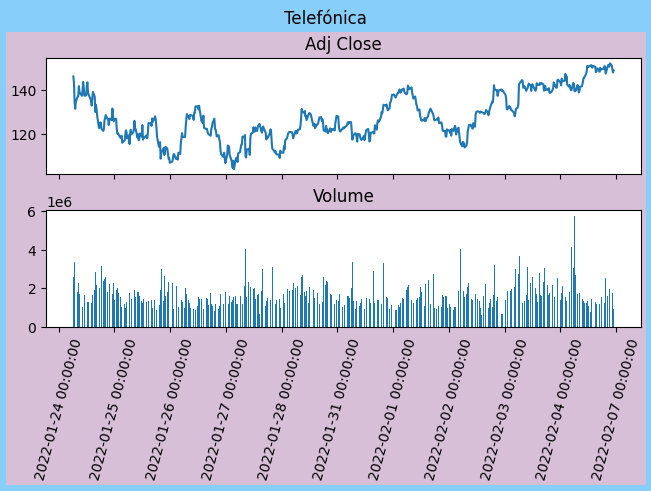

In [15]:
#DETERMINO EL MARCO DE TODA LA FIGURA
fig = plt.figure(layout='constrained', facecolor='lightskyblue')
fig.suptitle('Telefónica')

#DETERMINO LA PRIMERA DIVISIÓN DE 2 FILA 1 COLUMNAS
figL = fig.subfigures(1, 1)
figL.set_facecolor('thistle')

# EN LA DIVISIÓN DE LA IZQUIERDA CREO OTRA SUBDIVISIÓN DE 2 FILAS UNA COLUMNA
axL = figL.subplots(2, 1, sharex=True)


# PRIMER GRÁFICO
axL[0].set_title('Adj Close')
axL[0].plot(df[['TEL']])

# SEGUNDO GRÁFICO
axL[1].set_title('Subgráfico 2')
axL[1].set_title('Volume')
axL[1].bar(dfv.index, dfv['TEL'])
axL[1].xaxis.set_ticklabels(dfv.index, rotation=75)

PASO 7: Cambio porcentual diario

In [16]:
porcentaje_diario=(df/df.shift())-1
porcentaje_diario

,GOLD,TEL,IBM
Date,,,
2022-01-24,NaN,NaN,NaN
2022-01-25,0.0062,-0.0217,0.0565
2022-01-26,-0.0236,-0.0568,-0.0135
2022-01-27,-0.0168,-0.0245,-0.0130
...,...,...,...
2024-06-24,0.0097,-0.0059,0.0148
2024-06-25,-0.0078,-0.0107,-0.0138
2024-06-26,0.0127,-0.0110,-0.0042
2024-06-27,0.0024,0.0059,-0.0059


<Axes: xlabel='Date'>

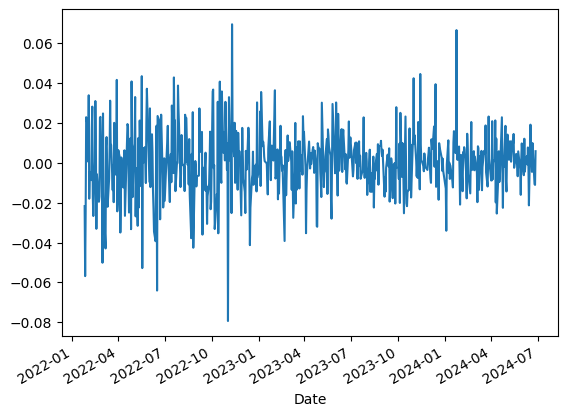

In [17]:
porcentaje_diario['TEL'].plot()

PASO 8: Retorno acumulativo diario

In [18]:
retorno_diario_acumulativo=(1+porcentaje_diario).cumprod()
retorno_diario_acumulativo

,GOLD,TEL,IBM
Date,,,
2022-01-24,NaN,NaN,NaN
2022-01-25,1.0062,0.9783,1.0565
2022-01-26,0.9824,0.9227,1.0422
2022-01-27,0.9659,0.9001,1.0287
...,...,...,...
2024-06-24,0.9291,1.0344,1.5254
2024-06-25,0.9219,1.0233,1.5044
2024-06-26,0.9335,1.0121,1.4980
2024-06-27,0.9358,1.0180,1.4891


<Axes: xlabel='Date'>

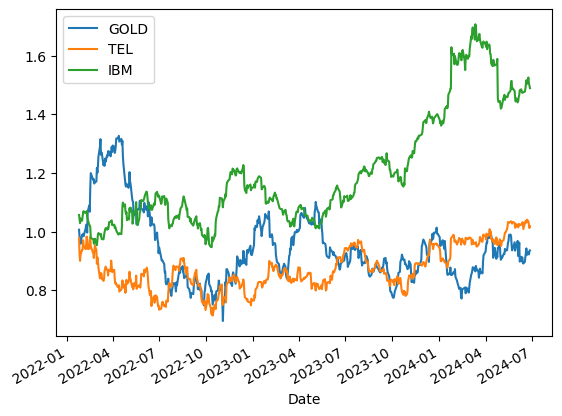

In [19]:
retorno_diario_acumulativo.plot()

PASO 9: Remuestreo de datos de retornos diarios a mensuales

In [20]:
# M = FRECUENCIA MENSUAL
#  method="ffill" REEMPLAZA LOS VALORES NAN POR EL VALOR ANTERIOR

frecuencia_mensual=df.asfreq('M', method="ffill")
frecuencia_mensual

C:\Users\gdfra\AppData\Local\Temp\ipykernel_1608\3399703483.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  frecuencia_mensual=df.asfreq('M', method="ffill")


,GOLD,TEL,IBM
Date,,,
2022-01-31,17.7915,136.9802,118.9612
2022-02-28,21.0623,136.8817,110.4251
2022-03-31,22.8914,125.8778,117.1943
2022-04-30,20.8197,119.9193,119.1683
...,...,...,...
2024-02-29,14.5743,142.9447,183.2113
2024-03-31,16.5427,144.6175,189.0830
2024-04-30,16.5427,140.8736,164.5664
2024-05-31,17.0900,149.7000,166.8500


El cambio porcentual mensual queda

In [21]:
porcentaje_mensual=(frecuencia_mensual/frecuencia_mensual.shift())-1
porcentaje_mensual

,GOLD,TEL,IBM
Date,,,
2022-01-31,NaN,NaN,NaN
2022-02-28,0.1838,-0.0007,-0.0718
2022-03-31,0.0868,-0.0804,0.0613
2022-04-30,-0.0905,-0.0473,0.0168
...,...,...,...
2024-02-29,-0.0537,0.0138,0.0166
2024-03-31,0.1351,0.0117,0.0320
2024-04-30,0.0000,-0.0259,-0.1297
2024-05-31,0.0331,0.0627,0.0139


<Axes: xlabel='Date'>

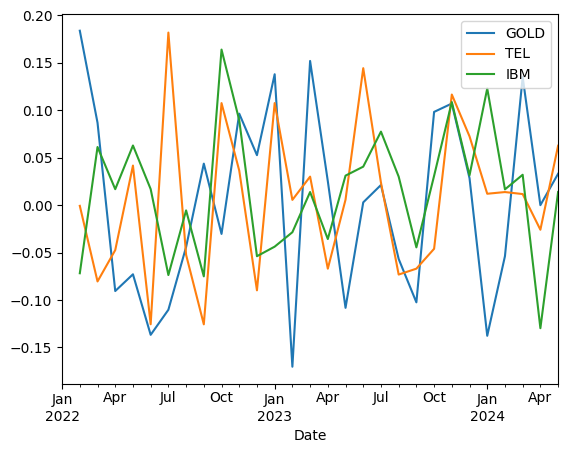

In [22]:
porcentaje_mensual.plot()

El cambio acumulativo queda

In [23]:
retorno_mensual_acumulativo=(1+porcentaje_mensual).cumprod()
retorno_mensual_acumulativo

,GOLD,TEL,IBM
Date,,,
2022-01-31,NaN,NaN,NaN
2022-02-28,1.1838,0.9993,0.9282
2022-03-31,1.2866,0.9189,0.9851
2022-04-30,1.1702,0.8754,1.0017
...,...,...,...
2024-02-29,0.8192,1.0435,1.5401
2024-03-31,0.9298,1.0558,1.5895
2024-04-30,0.9298,1.0284,1.3834
2024-05-31,0.9606,1.0929,1.4026


<Axes: xlabel='Date'>

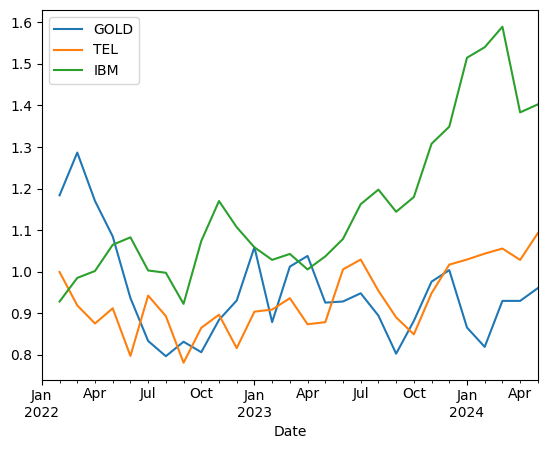

In [24]:
retorno_mensual_acumulativo.plot()

PASO 10: Análisis de la distribución de los rendimientos

<Axes: >

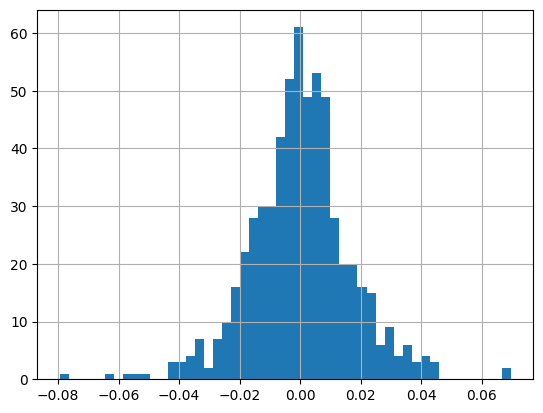

In [25]:
porcentaje_diario['TEL'].hist(bins=50)

In [26]:
porcentaje_diario['TEL'].describe()

count    609.0000
mean       0.0002
std        0.0168
min       -0.0794
25%       -0.0095
50%        0.0004
75%        0.0092
max        0.0696
Name: TEL, dtype: float64

array([[<Axes: title={'center': 'GOLD'}>,
        <Axes: title={'center': 'TEL'}>],
       [<Axes: title={'center': 'IBM'}>, <Axes: >]], dtype=object)

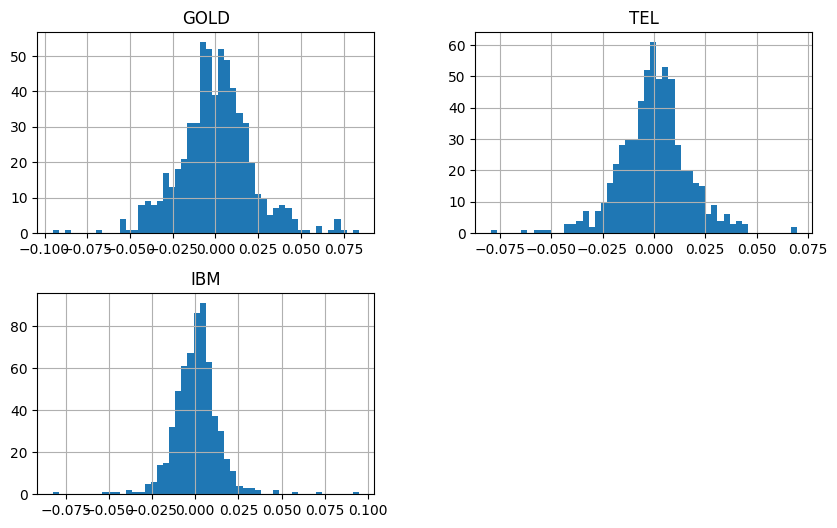

In [27]:
porcentaje_diario.hist(bins=50, figsize=(10,6))

PASO 11: Comparación de los rendimientos diarios promedio entre acciones

Text(0, 0.5, 'GOLD')

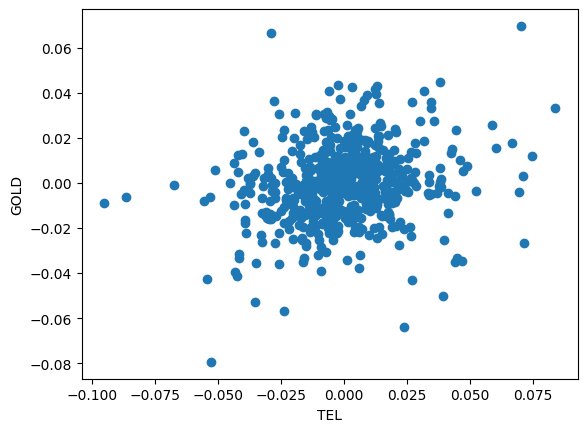

In [28]:
plt.scatter(porcentaje_diario['GOLD'], porcentaje_diario['TEL'])
plt.xlabel('TEL')
plt.ylabel('GOLD')

array([[<Axes: xlabel='GOLD', ylabel='GOLD'>,
        <Axes: xlabel='TEL', ylabel='GOLD'>,
        <Axes: xlabel='IBM', ylabel='GOLD'>],
       [<Axes: xlabel='GOLD', ylabel='TEL'>,
        <Axes: xlabel='TEL', ylabel='TEL'>,
        <Axes: xlabel='IBM', ylabel='TEL'>],
       [<Axes: xlabel='GOLD', ylabel='IBM'>,
        <Axes: xlabel='TEL', ylabel='IBM'>,
        <Axes: xlabel='IBM', ylabel='IBM'>]], dtype=object)

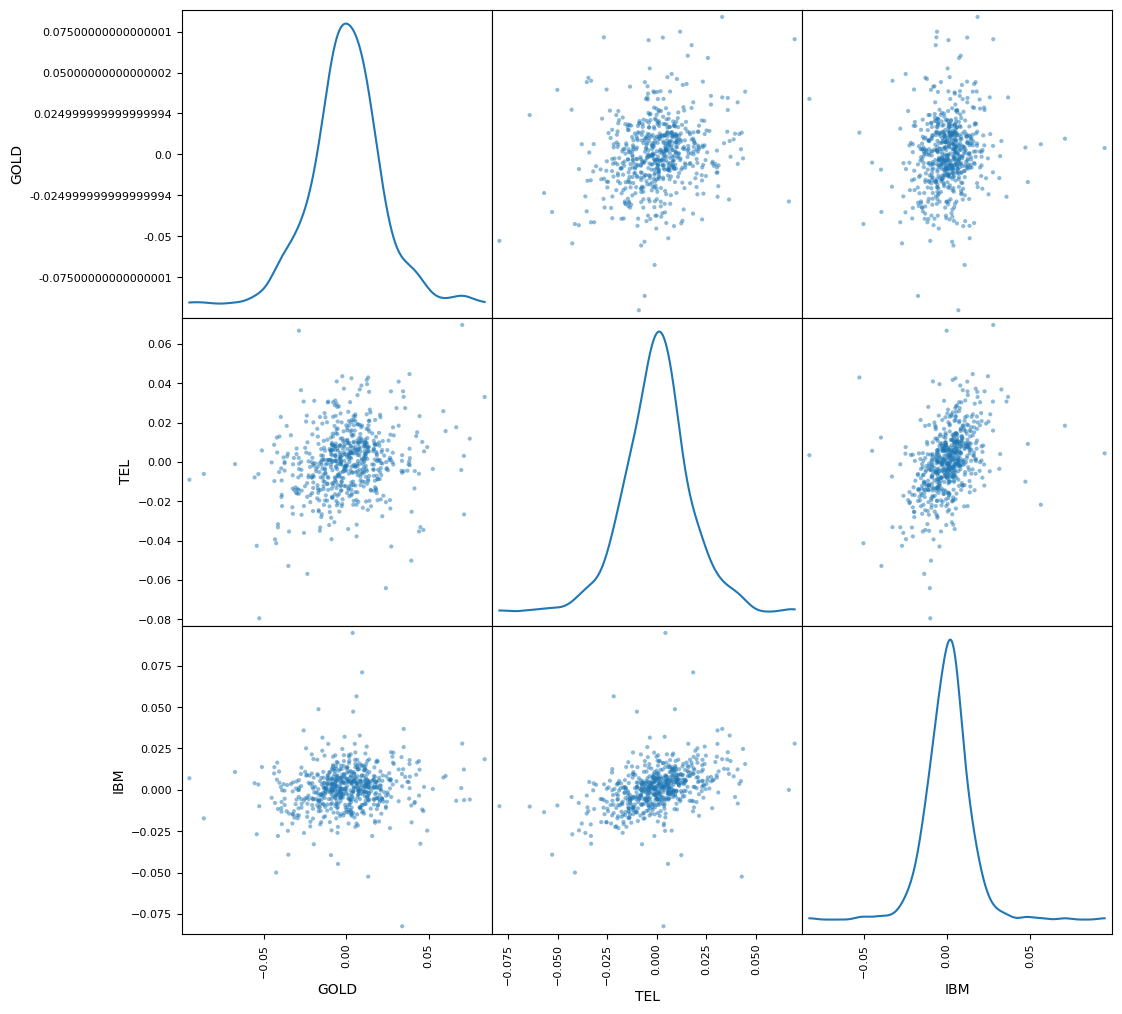

In [29]:
pd.plotting.scatter_matrix(porcentaje_diario, diagonal="kde", figsize=(12,12))

PASO 12: Correlación de acciones basada en el cambio porcentual diario del precio de cierre.

In [30]:
correlaciones=porcentaje_diario.corr()
correlaciones

,GOLD,TEL,IBM
GOLD,1.0000,0.2044,0.1283
TEL,0.2044,1.0000,0.4065
IBM,0.1283,0.4065,1.0000


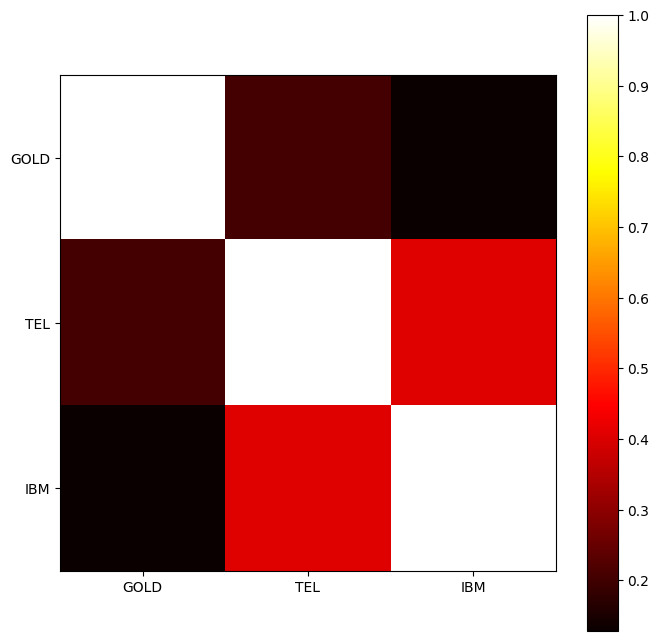

In [31]:
plt.imshow(correlaciones, cmap='hot', interpolation="None")
plt.colorbar()
plt.xticks(range(len(correlaciones)), correlaciones.columns)
plt.yticks(range(len(correlaciones)), correlaciones.columns)
plt.gcf().set_size_inches(8,8)

PASO 13: Cálculo de volatilidad.

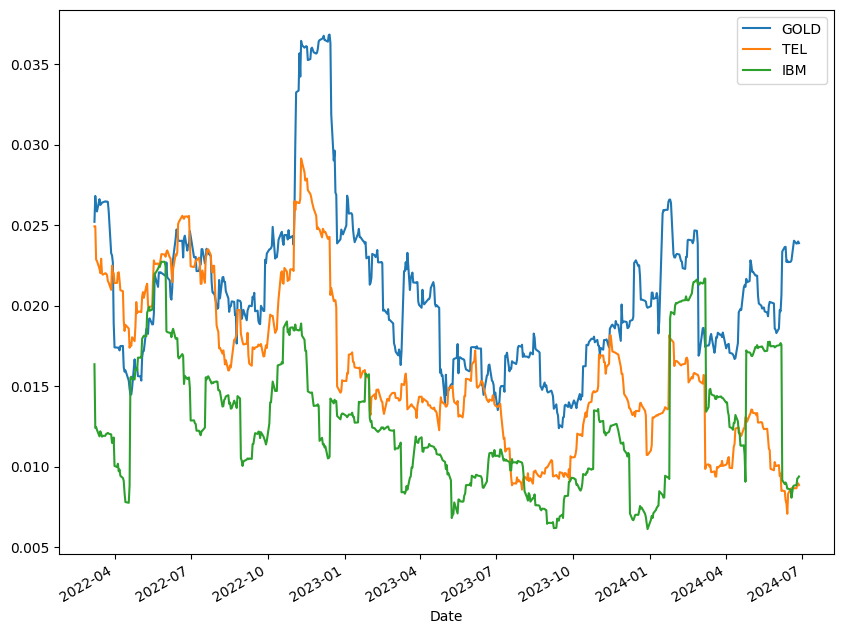

In [32]:
min_periods = 75

vol=porcentaje_diario.rolling(30).std()
vol.plot(figsize=(10, 8));

PASO 14: Cálculo de media móvil

In [33]:
df = filtro_por_columna(precios, "Adj Close")

In [34]:
mm_30 = df['TEL'].rolling(30).mean()
mm_90 = df['TEL'].rolling(90).mean()

Creamos DataFrame para graficar

In [35]:
resultado=pd.DataFrame({
    'Adj Close':df['TEL'],
    'MM_Close_30': mm_30,
    'MM_Close_90': mm_90,
})

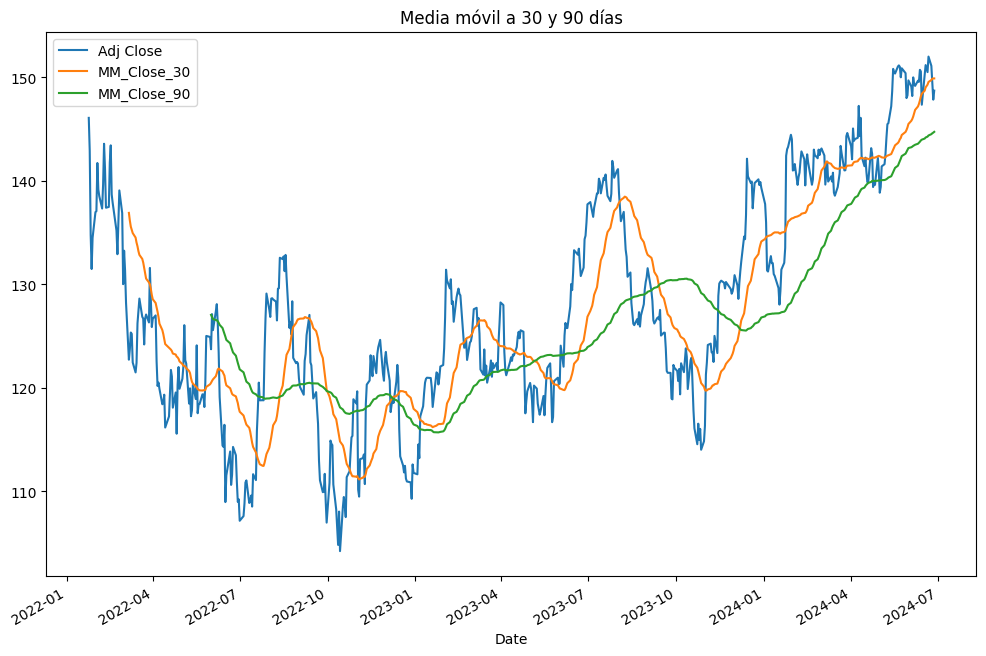

In [36]:
resultado.plot(title='Media móvil a 30 y 90 días')
plt.gcf().set_size_inches(12,8)

PASO 15: Determinación del riesgo en relación con los rendimientos esperados.

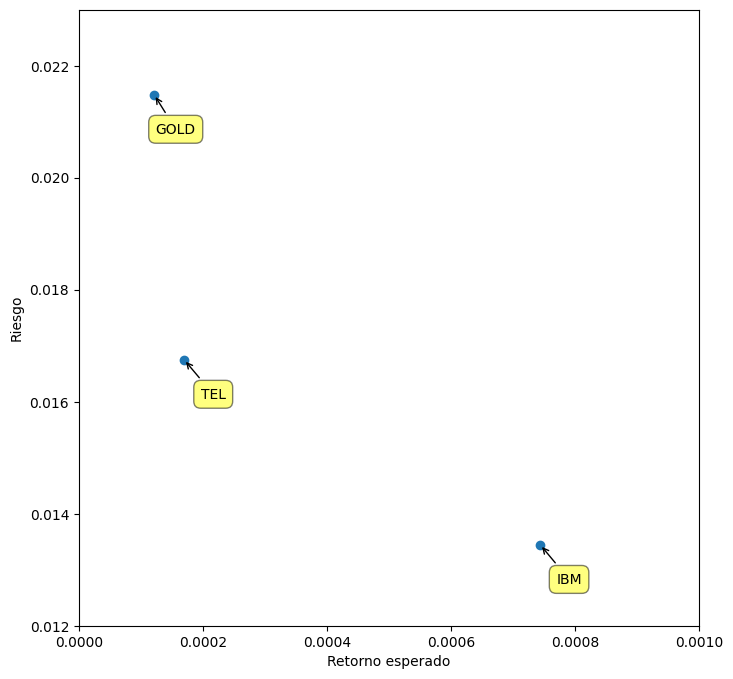

In [37]:
plt.scatter(porcentaje_diario.mean(), porcentaje_diario.std())
plt.xlabel('Retorno esperado')
plt.ylabel('Riesgo')

for label, x, y in zip(porcentaje_diario.columns, porcentaje_diario.mean(), porcentaje_diario.std()):
    plt.annotate( 
        label, xy = (x, y), 
        xytext = (30, -30), 
        textcoords = 'offset points', 
        ha = 'right', 
        va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5',
        fc = 'yellow',
        alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


plt.xlim(0, 0.001)
plt.ylim(0.012, 0.0230)
plt.gcf().set_size_inches(8,8)